# Avocado Data Analysis

# Busisnes Understanding

The aim of this project is to answer the following four questions: 1.Which region are the lowest and highst price of avocado?
    2.what is the highest region of avocado production? 3.what is the average avocado prise in each year? 4.what is the average avocodo volume in each year?

# Data Understanding 
The Avocado dataset was been used in this project.

This dataset contains 13columns: 1. Date - The date of the observation 2. AveragePrice: the average price of a single avocado 3. Total Volume: Total number of avocados sold 4. Total Bags: Total number o bags 5. Small Bags: Total number of Small bags 6. Large Bags: Total number of Large bags 7. XLarge Bags: Total number of XLarge bags 8. type: conventional or organic 9. year: the year 10. region: the city or region of the observation 11. 4046: Total number of avocados with PLU 4046 sold 12. 4225: Total number of avocados with PLU 4225 sold 13. 4770: Total number of avocados with PLU 4770 sold

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Creating DataFrames
 - From a list of dictionaries(constructed row by row)

In [72]:
list_of_dicts = [
    {"name":"Ginger","breed":"Dachshund", "height_cm":22,"weight_kg":10, "date_of_birth": "2019-03-14"},
    {"name": "Scout", "breed": "Dalmation", "heigh_cm": 59, "weight_kg": 25, "date_of_birth": "2019-05-09"}
]
new_dogs = pd.DataFrame(list_of_dicts)
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth,heigh_cm
0,Ginger,Dachshund,22.0,10,2019-03-14,NaN
1,Scout,Dalmation,NaN,25,2019-05-09,59.0


In [73]:
dict_of_lists = { 
     "name": ["Ginger", "Scout"], 
     "breed": ["Dachshund", "Dalmatian"], 
     "height_cm": [22, 59], 
     "weight_kg": [10, 25], 
     "date_of_birth": ["2019-03-14","2019-05-09"]  } 
new_dogs = pd.DataFrame(dict_of_lists) 
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


<a id="Reading-and-writing-CSVs"></a>
# Reading and writing CSVs
* CSV = comma-separated values 
* Designed for DataFrame-like data 
* Most database and spreadsheet programs can use them or create them


In [79]:
# read CSV from using pandas
avocado = pd.read_csv(r"C:\Users\govin\DATA SCINCES CLASS NOTES\projects\RESUME PROJECT -- PRICE PREDICTION\avocado.csv")
# print the first few rows of the dataframe
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Read CSV and assign index
<p>You can assign columns as index using "index_col" attribute.</p>
<p>Since I want to index Date there is another helpful function called "parse_date" which will parse the date in the rows such that we can perform more complex subsetting(eg monthly, weekly etc).</p>

In [81]:
# read CSV from using pandas and assigning Date as index of the dataframe
avocado = pd.read_csv(r"C:\Users\govin\DATA SCINCES CLASS NOTES\projects\RESUME PROJECT -- PRICE PREDICTION\avocado.csv",parse_dates=True, index_col='Date')
# print the first few rows of the dataframe
avocado.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Remove index from dataframe.reset_index(drop)

To reset the index use this function

In [93]:
avocado = pd.read_csv(r"C:\Users\govin\DATA SCINCES CLASS NOTES\projects\RESUME PROJECT -- PRICE PREDICTION\avocado.csv")

In [82]:
avocado = avocado.reset_index(drop=True)
avocado.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


To write a CSV file function dataframe.to_csv(FILE_NAME)

In [83]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.8+ MB


In [84]:
print(avocado.shape)

(18249, 13)


In [85]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [86]:
avocado.values

array([[0, 1.33, 64236.62, ..., 'conventional', 2015, 'Albany'],
       [1, 1.35, 54876.98, ..., 'conventional', 2015, 'Albany'],
       [2, 0.93, 118220.22, ..., 'conventional', 2015, 'Albany'],
       ...,
       [9, 1.87, 13766.76, ..., 'organic', 2018, 'WestTexNewMexico'],
       [10, 1.93, 16205.22, ..., 'organic', 2018, 'WestTexNewMexico'],
       [11, 1.62, 17489.58, ..., 'organic', 2018, 'WestTexNewMexico']],
      dtype=object)

In [88]:
print(avocado.columns)

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


<a id="Sorting"></a>
# Sorting
syntax:<br>
> DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind=’quicksort’, na_position=’last’)

* by: Single/List of column names to sort Data Frame by.
* axis: 0 or ‘index’ for rows and 1 or ‘columns’ for Column.
* ascending: Boolean value which sorts Data frame in ascending order if True.
* inplace: Boolean value. Makes the changes in passed data frame itself if True.
* kind: String which can have three inputs(‘quicksort’, ‘mergesort’ or ‘heapsort’) of algorithm used to sort data frame.
* na_position: Takes two string input ‘last’ or ‘first’ to set position of Null values. Default is ‘last’.

In [89]:
# sort values based on "AveragePrice" (ascending) and "year" (descending)
avocado.sort_values(["AveragePrice", "year"], ascending=[True, False]) 

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15261,43,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
7412,47,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
15473,43,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
15262,44,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
1716,0,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,18,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
16055,42,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
14124,7,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
17428,37,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa


### Sorting by index
use.df.sort_index(ascending=True/False)

# Subsetting
subsetting is used to get a slice of the original dataframe

In [90]:
# Subsetting columns
avocado["AveragePrice"]

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# Subsetting multiple columns

In [94]:
# Subsetting multiple columns
avocado[["AveragePrice","Date"]]

,AveragePrice,Date
0,1.33,2015-12-27
1,1.35,2015-12-20
2,0.93,2015-12-13
3,1.08,2015-12-06
4,1.28,2015-11-29
...,...,...
18244,1.63,2018-02-04
18245,1.71,2018-01-28
18246,1.87,2018-01-21
18247,1.93,2018-01-14


In [95]:
# Subsetting rows
avocado["AveragePrice"]<1

0        False
1        False
2         True
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: AveragePrice, Length: 18249, dtype: bool

and then using it for subsetting the original dataframe

In [96]:
# this will print only the rows with price < 1
avocado[avocado["AveragePrice"]<1]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
13,13,2015-09-27,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.0,conventional,2015,Albany
43,43,2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,43,2017-03-05,0.99,155011.12,35367.23,5175.81,5.91,114462.17,95379.07,19083.10,0.0,organic,2017,SouthCentral
17170,44,2017-02-26,0.99,171145.00,34520.03,6936.39,0.00,129688.58,117252.31,12436.27,0.0,organic,2017,SouthCentral
17536,39,2017-04-02,0.98,402676.23,34093.33,58330.53,207.85,310044.52,155701.41,154343.11,0.0,organic,2017,West
17537,40,2017-03-26,0.90,456645.91,36169.35,51398.72,139.55,368938.29,152159.53,216778.76,0.0,organic,2017,West


# Subsetting based on text data

In [97]:
# it will print all the rows with "type" = "organic"
avocado[avocado["type"]=="organic"]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Subsetting based on dates

In [98]:
# it will print all the rows with "Date" <= 2015-02-04
avocado[avocado["Date"]<="2015-02-04"]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
47,47,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
48,48,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
49,49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
50,50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,46,2015-02-01,1.77,7210.19,1634.42,3012.44,0.00,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,47,2015-01-25,1.63,7324.06,1934.46,3032.72,0.00,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,48,2015-01-18,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,49,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


### Subsetting based on multiple conditions
You can use the logical operators to define a complex condition<br>
* "&" and
* "|" or
* "~" not

> ** SEPERATE EACH CONDITION WITH PARENTHESES TO AVOID ERRORS**

In [100]:
# it will print all the rows with "Date" before 2015-02-04 and "type" == "organic"
avocado[(avocado["Date"]<"2015-02-04") & (avocado["type"]=="organic")]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9173,47,2015-02-01,1.83,1228.51,33.12,99.36,0.0,1096.03,1096.03,0.00,0.0,organic,2015,Albany
9174,48,2015-01-25,1.89,1115.89,14.87,148.72,0.0,952.30,952.30,0.00,0.0,organic,2015,Albany
9175,49,2015-01-18,1.93,1118.47,8.02,178.78,0.0,931.67,931.67,0.00,0.0,organic,2015,Albany
9176,50,2015-01-11,1.77,1182.56,39.00,305.12,0.0,838.44,838.44,0.00,0.0,organic,2015,Albany
9177,51,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,46,2015-02-01,1.77,7210.19,1634.42,3012.44,0.0,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,47,2015-01-25,1.63,7324.06,1934.46,3032.72,0.0,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,48,2015-01-18,1.71,5508.20,1793.64,2078.72,0.0,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,49,2015-01-11,1.69,6861.73,1822.28,2377.54,0.0,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


<a id="Subsetting-using"></a>
# Subsetting using .isin()
isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column

> Syntax: DataFrame.isin(values)
> 
> Parameters:
> values: iterable, Series, List, Tuple, DataFrame or dictionary to check in the caller Series/Data Frame.
> 
> Return Type: DataFrame of Boolean of Dimension.
> 

In [101]:
# Subset the avocado in the region Boston or SanDiego
regionFilter = avocado["region"].isin(["Boston", "SanDiego"])
avocado[regionFilter]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
208,0,2015-12-27,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston
209,1,2015-12-20,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston
210,2,2015-12-13,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston
211,3,2015-12-06,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston
212,4,2015-11-29,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,7,2018-02-04,1.81,17454.74,1158.41,7388.27,0.00,8908.06,8908.06,0.00,0.0,organic,2018,SanDiego
18101,8,2018-01-28,1.91,17579.47,1145.64,8284.41,0.00,8149.42,8149.42,0.00,0.0,organic,2018,SanDiego
18102,9,2018-01-21,1.95,18676.37,1088.49,9282.37,0.00,8305.51,8305.51,0.00,0.0,organic,2018,SanDiego
18103,10,2018-01-14,1.81,21770.02,3285.98,14338.52,0.00,4145.52,4145.52,0.00,0.0,organic,2018,SanDiego


## Multiple parameter Filtering
Use logical operators to combine different filters

In [102]:
# Subset the avocado in the region Boston or SanDiego in the year 2016 or 2017
regionFilter = avocado["region"].isin(["Boston", "SanDiego"])
yearFilter = avocado["year"].isin(["2016", "2017"])
avocado[regionFilter & yearFilter]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


## Detecting missing values .isna()
.isna() is a method used to find is there exist any NaN values in the DataFrame

It will give a True bool value if a cell has a NaN value

In [103]:
avocado.isna()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Wecan use .any() function to get a consise info

In [104]:
avocado.isna().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

## Counting missing values

In [105]:
avocado.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Removing missing values
- Drop NaN **.dropna()**
- Fill NaN with value x ** .fillna(x)**

In [106]:
# Luckily we don't have any NaN but if we have we can use any of the two methods

avocado.dropna()

# ****  OR  ****

meanVal = avocado["AveragePrice"].mean()
avocado.fillna(meanVal)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Adding a new column
It can  easily be done  using the [] brackets

Lets add a new column to our dataframe called AveragePricePer100

In [107]:
avocado["AversgePricePer100"] = avocado["AveragePrice"]*100
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AversgePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,163.0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,171.0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,187.0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,193.0


<a id="Deleting-columns-in-DataFrame"></a>
# Deleting columns in DataFrame .drop(lst,axis = 1)
> dataFrame.drop(['COLUMN_NAME'], axis = 1)
* the first parameter is a list of columns to be deleted
* axis = 1 means delete column
* axis = 0 means delete row

In [113]:
avocado.drop(["AversgePricePer100"],axis = 1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<a id="Summary-statistics"></a>
# Summary statistics
Some of the functions availabe in pandas are:

> .median() .mode() .min() .max() .var() .std() .sum() .quantile()

In [114]:
# mean of the AveragePrice of avocado
avocado["AveragePrice"].mean()

1.405978409775878

### Summarizing dates
To find the min or max date in dataframe

In [115]:
avocado["Date"].max()

'2018-03-25'

<a id=".agg-method"></a>
# .agg() method

Pandas Series.agg() is used to pass a function or list of function to be applied on a series or even each element of series separately.

> Syntax: Series.agg(func, axis=0)
> 
> Parameters:
> func: Function, list of function or string of function name to be called on Series.
> axis:0 or ‘index’ for row wise operation and 1 or ‘columns’ for column wise operation.
> 
> Return Type: The return type depends on return type of function passed as parameter.

In [116]:
def pct30(column):     
    #return the 0.3 quartile
    return column.quantile(0.3)
def pct50(column):     
    #return the 0.5 quartile
    return column.quantile(0.5)

avocado[["AveragePrice","Total Bags"]].agg([pct30,pct50])

,AveragePrice,Total Bags
pct30,1.15,7316.634
pct50,1.37,39743.830


<a id="Dropping-duplicate-names"></a>
# Dropping duplicate names .drop_duplicates(lst)
Delete all the duplicate names from the dataframe

In [117]:
temp = avocado.drop_duplicates(subset=["year"])
temp

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AversgePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,133.0
2808,0,2016-12-25,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,2.94,conventional,2016,Albany,152.0
5616,0,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.00,conventional,2017,Albany,147.0
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany,157.0


<a id="Count-categorical-data"></a>
# Count categorical data .value_counts()

Pandas Series.value_counts() function return a Series containing counts of unique values.

> Syntax: Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
> 
> Parameter :
normalize : If True then the object returned will contain the relative frequencies of the unique values.
sort : Sort by values.
ascending : Sort in ascending order.
bins : Rather than count values, group them into half-open bins, a convenience for pd.cut, only works with numeric data.
dropna : Don’t include counts of NaN.
> 
> Returns : counts : Series

In [118]:
# count number of avocado in each year in descending order
avocado["year"].value_counts(sort=True, ascending=False)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<a id="Grouped-summaries"></a>
# Grouped summaries .groupby(col)
This function will group similar categories into one and then we can perform some summary statistics

> Syntax: DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
> 
> Parameters :
> by : mapping, function, str, or iterable<br>
> axis : int, default 0<br>
> level : If the axis is a MultiIndex (hierarchical), group by a particular level or levels<br>
> as_index : For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output<br>
> sort : Sort group keys. Get better performance by turning this off. Note this does not influence the order of observations within each group. groupby preserves the order of rows within each group.<br>
> group_keys : When calling apply, add group keys to index to identify pieces<br>
> squeeze : Reduce the dimensionality of the return type if possible, otherwise return a consistent type<br>
> 
> Returns : GroupBy object

In [119]:
# group by multiple columns and perform multiple summary statistic operations
avocado.groupby(["year","type"])["AveragePrice"].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

<a id="Pivot-table"></a>
# Pivot table
A pivot table is a table of statistics that summarizes the data of a more extensive table.

IMPORRANT parements to remember are<br>
"index": it is the value that appeares on the left most side of the table (it can be a list)<br>
"columns": these are the column you want to add to the pivot table<br>
"aggfunc": it will call the function (it can be a list)<br>
"values": it is the attribute which will be summarized in the table (values inside the table)<br>

> Syntax<br>
> pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc=’mean’, fill_value=None, margins=False, dropna=True, margins_name=’All’)<br>
> 
> Parameters:<br>
data : DataFrame<br>
values : column to aggregate, optional<br>
index: column, Grouper, array, or list of the previousv
columns: column, Grouper, array, or list of the previous<br>
> 
> aggfunc: function, list of functions, dict, default numpy.mean<br>
....If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names.<br>
....If dict is passed, the key is column to aggregate and value is function or list of functions<br>
fill_value[scalar, default None] : Value to replace missing values with<br>
margins[boolean, default False] : Add all row / columns (e.g. for subtotal / grand totals)<br>
dropna[boolean, default True] : Do not include columns whose entries are all NaN<br>
margins_name[string, default ‘All’] : Name of the row / column that will contain the totals when margins is True.<br>
> 
> Returns: DataFrame

In [120]:
# this is the same table we build in the previous cell but using pivot table
avocado.pivot_table(index=["year","type"], aggfunc=[min,max,np.mean,np.median], values="AveragePrice")

min          max         mean       median
                  AveragePrice AveragePrice AveragePrice AveragePrice
year type                                                            
2015 conventional         0.49         1.59     1.077963         1.08
     organic              0.81         2.79     1.673324         1.67
2016 conventional         0.51         2.20     1.105595         1.08
     organic              0.58         3.25     1.571684         1.53
2017 conventional         0.46         2.22     1.294888         1.30
     organic              0.44         3.17     1.735521         1.72
2018 conventional         0.56         1.74     1.127886         1.14
     organic              1.01         2.30     1.567176         1.55

## Explicit indexes

indexes make subsetting simpler using.loc and .iloc

## Setting column as the index

In [121]:
regionIndex = avocado.set_index(["region"])
regionIndex

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AversgePricePer100
region,,,,,,,,,,,,,,
Albany,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,133.0
Albany,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,135.0
Albany,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,93.0
Albany,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,108.0
Albany,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,163.0
WestTexNewMexico,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,171.0
WestTexNewMexico,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,187.0


In [122]:
# Insted of doing this
avocado[avocado["region"].isin(["Albany", "WestTexNewMexico"])]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AversgePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,163.0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,171.0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,187.0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,193.0


In [123]:
# we can simply do
regionIndex.loc[["Albany", "WestTexNewMexico"]]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AversgePricePer100
region,,,,,,,,,,,,,,
Albany,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,133.0
Albany,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,135.0
Albany,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,93.0
Albany,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,108.0
Albany,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,163.0
WestTexNewMexico,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,171.0
WestTexNewMexico,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,187.0


## Visualizing your data

### Histograms

use the function .hist()

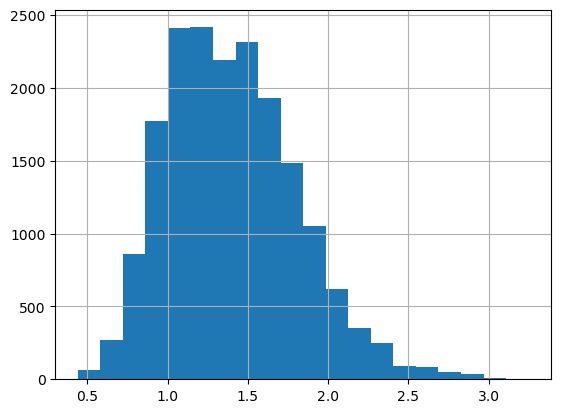

In [125]:
avocado["AveragePrice"].hist(bins=20)
plt.show()

## Bar plots

In [126]:
regionFilter = avocado.groupby("region")["AveragePrice"].mean().head(10)
regionFilter

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Name: AveragePrice, dtype: float64

<Axes: title={'center': 'Average price in 10 regions'}, xlabel='region'>

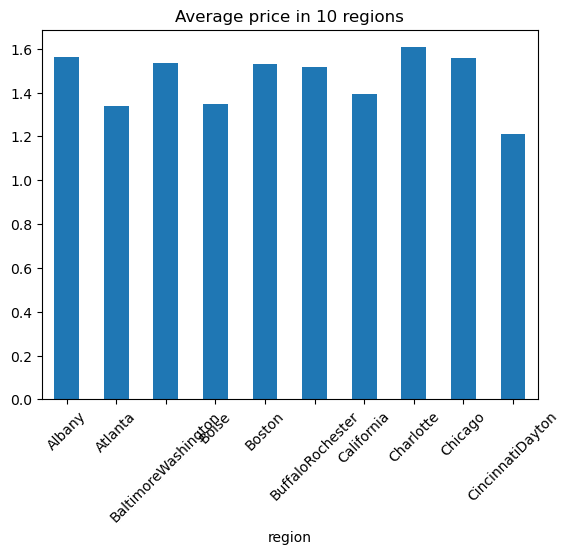

In [127]:
regionFilter.plot(kind = "bar",rot=45,title="Average price in 10 regions")

## Scatter plot

<Axes: xlabel='AveragePrice', ylabel='Total Volume'>

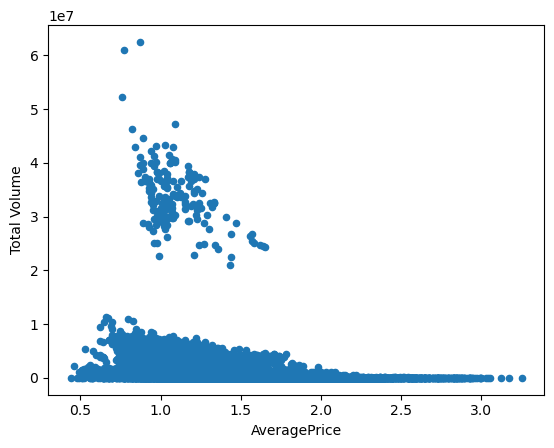

In [128]:
avocado.plot(x="AveragePrice", y="Total Volume", kind="scatter")

<a id="Arithmetic-with-Series-DataFrames"></a>
# Arithmetic with Series & DataFrames

You can use arithmetic operators directly on series but sometimes you need more control while performing these operations, here is where these explicit arithmetic functions come into the picture

Add/Subtract function (just replece add with sub)
```
Syntax: Series.add(other, level=None, fill_value=None, axis=0)

Parameters:
other: other series or list type to be added into caller series
fill_value: Value to be replaced by NaN in series/list before adding
level: integer value of level in case of multi index

Return type: Caller series with added values
```

Multiplication function
```
Syntax: Series.mul(other, level=None, fill_value=None, axis=0)

Parameters:
other: other series or list type to be added into caller series
fill_value: Value to be replaced by NaN in series/list before adding
level: integer value of level in case of multi index

Return type: Caller series with added values
```

Division function
```
Syntax: Series.div(other, level=None, fill_value=None, axis=0)

Parameters:
other: other series or list type to be divided by the caller series
fill_value: Value to be replaced by NaN in series/list before division
level: integer value of level in case of multi index

Return type: Caller series with divided values
```

In [129]:
# subtract AveragePrice with AveragePrice :P
# Dah its 0
avocado["AveragePrice"].sub(avocado["AveragePrice"]) 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18244    0.0
18245    0.0
18246    0.0
18247    0.0
18248    0.0
Name: AveragePrice, Length: 18249, dtype: float64

# Data preparation

Load data

In [2]:
df = pd.read_csv(r"C:\Users\govin\DATA SCINCES CLASS NOTES\projects\RESUME PROJECT -- PRICE PREDICTION\avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Droping unnecessery columns 

In [7]:
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [8]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Answering questions

In [9]:
def get_avarage(df,column):
    '''
    Description: This function to return the avarage value of the column
    
    Arguments:
        df: the DataFrame.
        column: the selected column.
    Returns:
        column's average
    '''
    return sum(df[column])/len(df)

In [10]:
def get_avarage_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the avarage between two columns in the dataset
    
    Arguments:
         df: the DataFrame.
         column1:the first column.
         column2:the second column.
    Returns:
         Sorted data from relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average = []
    
    for i in List:
        x=df[df[column1]==i]
        column1_average=get_avarage(x,column2)
        average.append(column1_average)
        
    df_column1_column2=pd.DataFrame({'column1':List, 'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [11]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot
    
    Arguments:
         df: the DataFrame.
         xlabel: the label of the first column.
         ylabel: the label of the second column.
    Returns:
        None
    """
    
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage' +ylabel+ 'of Avocado Acroding to' +xlabel));

# Which region are lowest and highest price of Avocado?

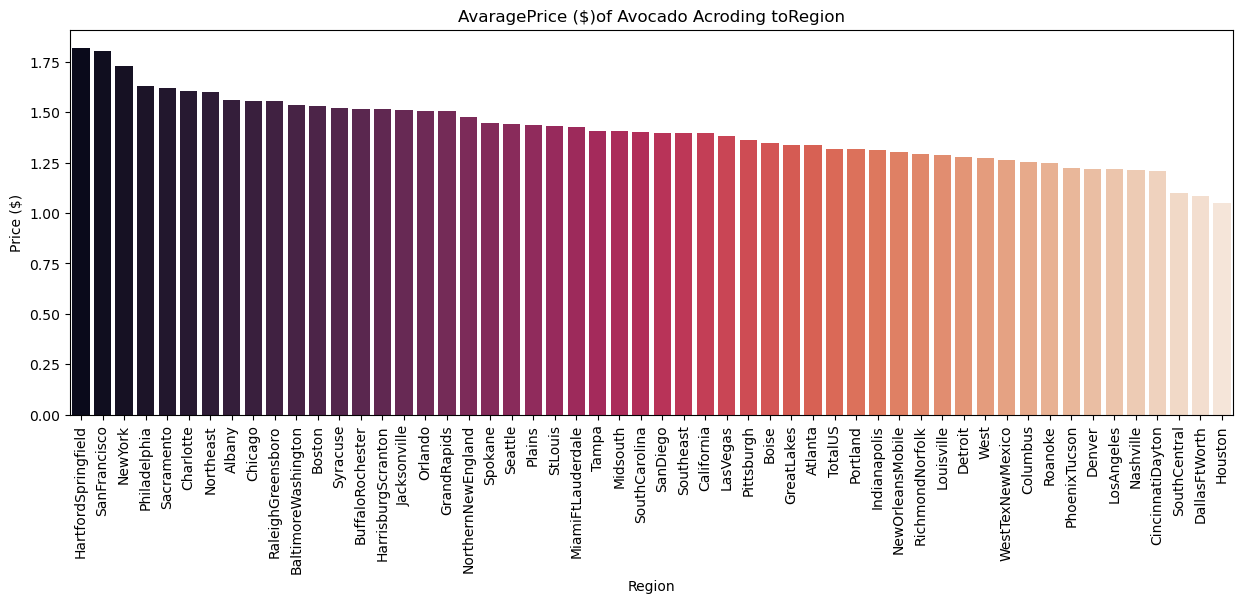

In [12]:
data1 = get_avarage_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price ($)')

In [13]:
print(data1['column1'].iloc[-1], "is the region producing avocado with the lowest price.")

Houston is the region producing avocado with the lowest price.


# What is the highest region of Avocado production?

Checking if there are outliter values or not

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

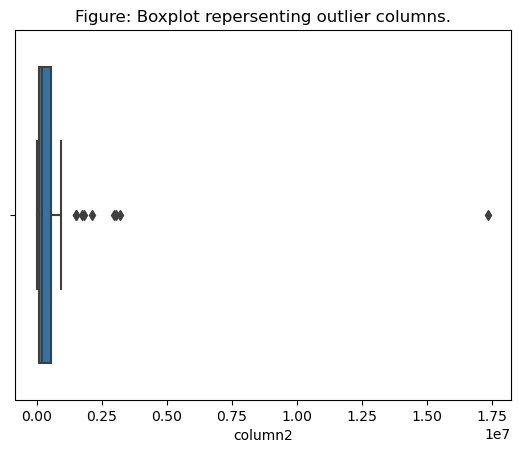

In [14]:
data2 = get_avarage_between_two_columns(df, 'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [15]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


Remove the outlier values

In [16]:
outlier_region.index
data2=data2.drop(outlier_region.index,axis=0)

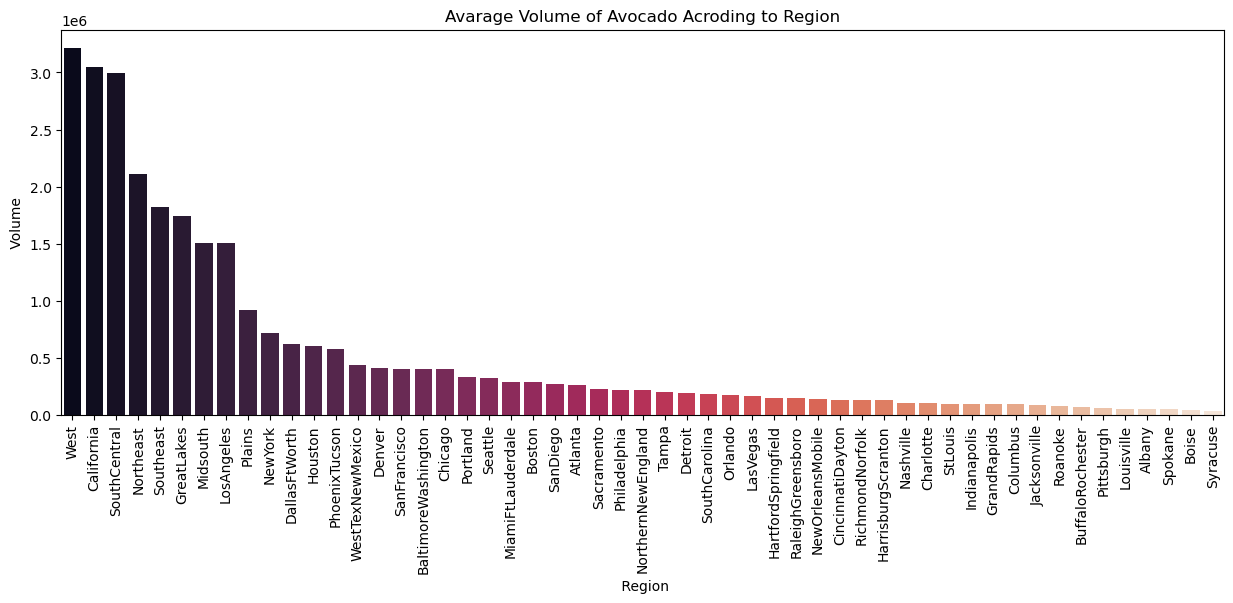

In [17]:
plot(data2,' Region',' Volume ')

# What is the average avocado prices in each year?

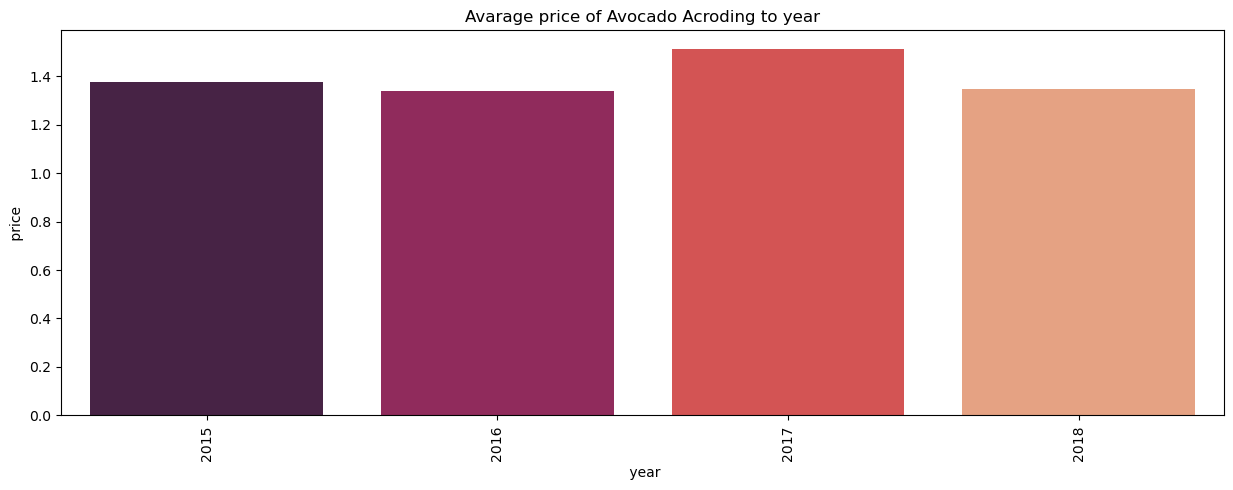

In [18]:
data3 = get_avarage_between_two_columns(df, 'year', 'AveragePrice')
plot(data3,' year',' price ')

# What is the avarage avocado volume in each year?

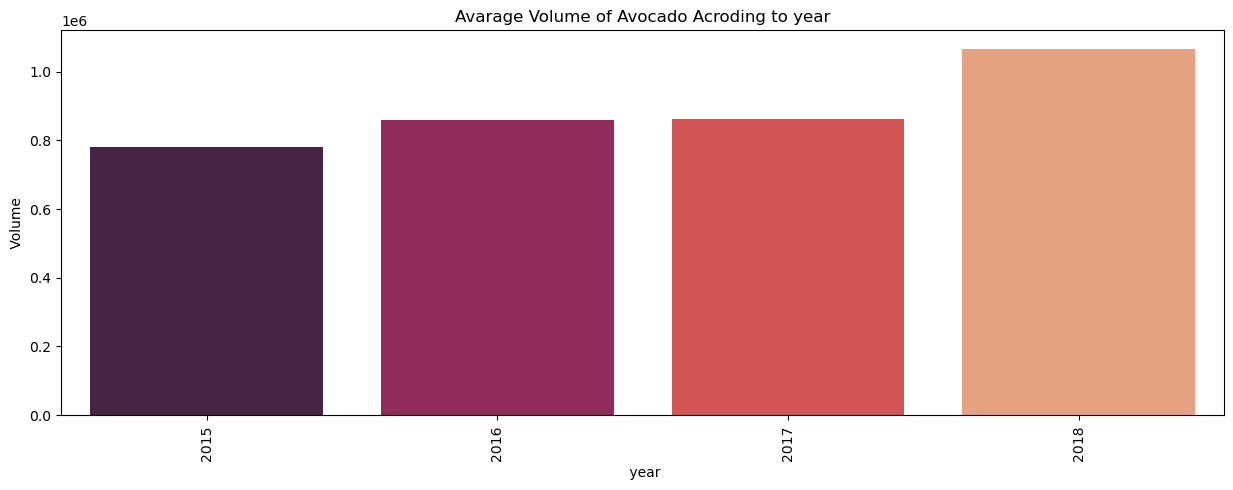

In [19]:
data4 = get_avarage_between_two_columns(df,'year','Total Volume')
plot(data4,' year', ' Volume ')

# Data Modeling

We bulit the regrestion model by used Linear regresion from sklearn to predict the avocado price.

# Changing some column types to categories

In [20]:
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

df['type']=df['type'].astype('category')
df['type']=df['type'].cat.codes

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [22]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [29]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [30]:
print("training set:",x_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",x_test.shape,' - ',y_test.shape[0],' samples')

training set: (12774, 8)  -  12774  samples
testing set: (5475, 8)  -  5475  samples


In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Evaluate the Results

In [33]:
test_pre = model.predict(x_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.58074176465986


In [34]:
train_pre = model.predict(x_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.58074176465986


The model doesn't work well with this dataset, In order to the avocado prices were near together

# Predicting the prices of Avocado

## About the data-      
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevent colums in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

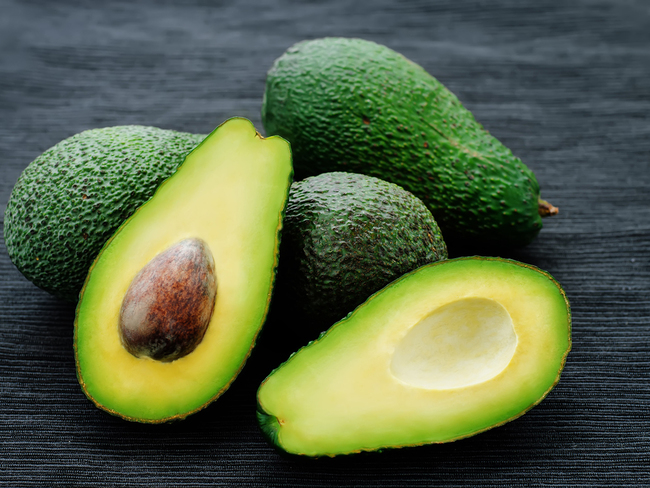

In [35]:
#Display image using python
from IPython.display import Image
url = r'C:\Users\govin\DATA SCINCES CLASS NOTES\projects\RESUME PROJECT -- PRICE PREDICTION\Fruti.jpg'
Image(url,height=300,width=400)

In [36]:
data = pd.read_csv(r'C:\Users\govin\DATA SCINCES CLASS NOTES\projects\RESUME PROJECT -- PRICE PREDICTION\avocado.csv',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [37]:
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


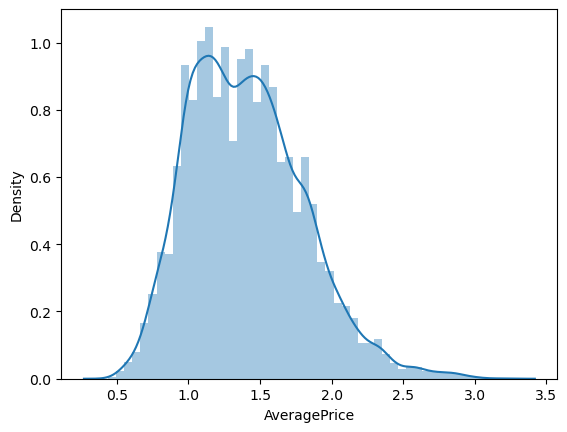

In [38]:
sns.distplot(data['AveragePrice']);

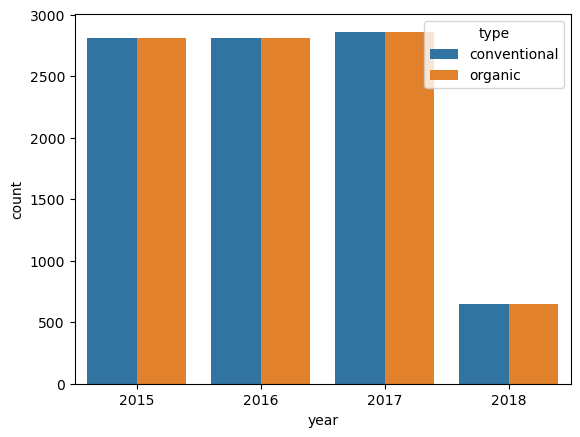

In [39]:
sns.countplot(x='year', data=data, hue='type');

There are almost equal numbeers of conventional and organic avacados. Though, there is very less observations in the year 2018.

In [40]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

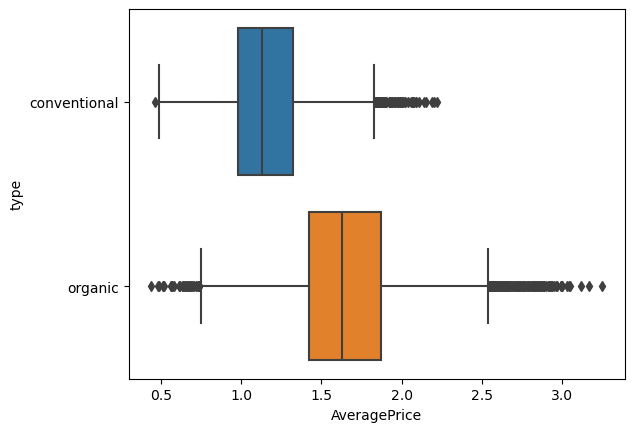

In [41]:
sns.boxplot(y='type', x='AveragePrice', data=data);

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

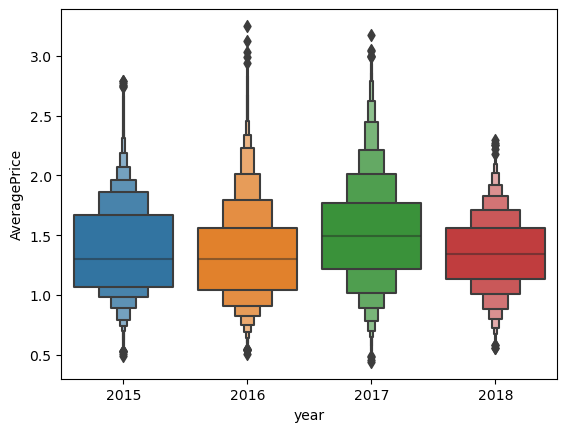

In [51]:
data.year=data.year.apply(str)
sns.boxenplot(x='year', y='AveragePrice', data=data);

Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

# Dealing with categorical features.

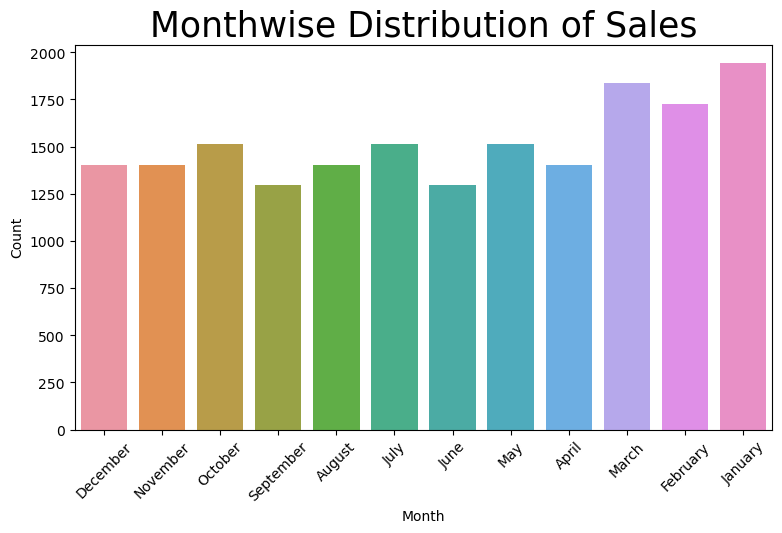

In [54]:
if 'type' in data.columns:
  # Encode data types (optional, but improves clarity)
  data['type'] = data['type'].map({'conventional': 0, 'organic': 1})
    
# Check if the "ActualDate" column exists
if 'Date' in data.columns:
  # Extract month from date column (if the column exists)
  data['Date'] = pd.to_datetime(data['Date'])  # Vectorized conversion
  data['Month'] = data['Date'].dt.month_name()  # Get full month name

  # Drop "ActualDate" if not needed (consider keeping it for future analysis)
  data.drop('Date', axis=1, inplace=True)

# Visualization
plt.figure(figsize=(9, 5))
sns.countplot(x='Month', data=data)  # Use 'x' for categorical data (month names)
plt.title('Monthwise Distribution of Sales', fontsize=25)
plt.xlabel('Month')  # Add label for x-axis
plt.ylabel('Count')  # Add label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
plt.show()


It implies that sales of avacado see a rise in January,Febuary and March.

# Preparing data for ML models

In [56]:
data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
Month           0
dtype: int64

In [57]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046','4225', '4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']],dummies],axis=1)
target = data['AveragePrice']

# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[cols_to_std])
x_train[cols_to_std]=scaler.transform(x_train[cols_to_std])
x_test[cols_to_std]= scaler.transform(x_test[cols_to_std])

In [58]:
#Importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
regressors = {
  'Linear Regression': LinearRegression(),
  'Decision Tree': DecisionTreeRegressor(),
  'Random Forest': RandomForestRegressor(n_estimators=100),  # Added n_estimators
  'Support Vector Machines': SVR(gamma=1),
  'K-nearest Neighbrors': KNeighborsRegressor(n_neighbors=10),
  'XGBoost': XGBRFRegressor()
}

results = pd.DataFrame(columns=['MAE', 'MSE', 'R2-score'])
import warnings  # Import warnings library

for method, func in regressors.items():
  try:
    model = func.fit(x_train, y_train)
    pred = model.predict(x_test)
    results.loc[method] = [np.round(mean_absolute_error(y_test, pred), 3),
                           np.round(mean_squared_error(y_test, pred), 3),
                           np.round(r2_score(y_test, pred), 3)]
  except (ImportError, AttributeError) as e:  # Catch multiple exceptions
    warnings.warn(f"Error fitting {method}: {e}")  # Use warnings instead of failing

print(results)


                           MAE    MSE  R2-score
Linear Regression        0.275  0.113     0.296
Decision Tree            0.153  0.050     0.686
Random Forest            0.111  0.024     0.851
Support Vector Machines  0.158  0.047     0.707
XGBoost                  0.186  0.058     0.634


# Deep Neural Network

In [63]:
# Splitting train set into training and validation sets.
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20)

#Importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [64]:
model.fit(x=x_train.values,y=y_train.values,
         validation_data=(x_val.values,y_val.values),
         batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6658 - val_loss: 0.1429
Epoch 2/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1708 - val_loss: 0.1618
Epoch 3/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1352 - val_loss: 0.1069
Epoch 4/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1219 - val_loss: 0.0895
Epoch 5/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1091 - val_loss: 0.0809
Epoch 6/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0970 - val_loss: 0.0830
Epoch 7/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0895 - val_loss: 0.0645
Epoch 8/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0848 - val_loss: 0.0560
Epoch 9/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0747 - val_loss: 0.0542
Epoch 10/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0712 - val_loss: 0.0476
Epoch 11/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0658 - val_loss: 0.0418
Epoch 12/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0241 - val_loss: 0.0261
Epoch 70/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0216 - val_loss: 0.0265
Epoch 71/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0214 - val_loss: 0.0284
Epoch 72/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0244 - val_loss: 0.0261
Epoch 73/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0232 - val_loss: 0.0264
Epoch 74/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0211 - val_loss: 0.0263
Epoch 75/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0211 - val_loss: 0.0261
Epoch 76/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0211 - val_loss: 0.0260
Epoch 77/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0221 - val_loss: 0.0260
Epoch 78/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0221 - val_loss: 0.0263


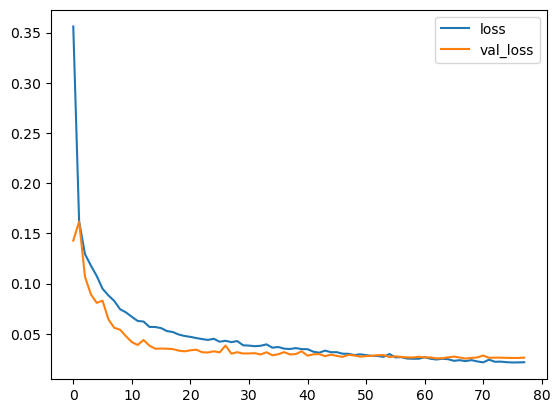

In [65]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [66]:
dnn_pred = model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Results table

In [67]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                   r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.274,0.112,0.302
Decision Tree,0.133,0.041,0.741
Random Forest,0.096,0.019,0.884
Support Vector Machines,0.132,0.033,0.792
XGBoost,0.188,0.060,0.626
Deep Neural Network,0.114,0.026,0.835


In [69]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

let's have a look at methods performing best as they have R2-score close to 1.

In [71]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
Random Forest,0.111000,0.024000,0.851000
Support Vector Machines,0.158000,0.047000,0.707000
Decision Tree,0.153000,0.050000,0.686000
XGBoost,0.186000,0.058000,0.634000
Linear Regression,0.275000,0.113000,0.296000


# conclusion:
 - Except linear regression model all other models have mean absolute error less than 10% of mean of target variable.
 - For this dataset XGBoost and Random Forest algorithms have shown best results.